In [78]:
import numpy as np
import matplotlib.pyplot as plt

import os

import george
from george import kernels

plt.style.use('seaborn-dark')

# defalut style - original (not seaborn)
# plt.style.use('default')

C:\Users\user\AppData\Local\Temp\ipykernel_15112\2980743991.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [2]:
# directories
dysp_path = r'C:\Users\user\OneDrive - Deccan Education Society\Uni_Bonn\Masters_Thesis\TPA_DATA\dysp_arrays'
metadata_path = r'C:\Users\user\OneDrive - Deccan Education Society\Uni_Bonn\Masters_Thesis\TPA_DATA\metadata'

# reading all dynamic spectra
# Path to the folder containing the .npy files
folder_path = r'C:\Users\user\OneDrive - Deccan Education Society\Uni_Bonn\Masters_Thesis\TPA_DATA\dysp_arrays'

# List all files in the folder
all_files = os.listdir(folder_path)

# Filter to include only .npy files
npy_files = [f for f in all_files if f.endswith('.npy')]

# Dictionary to store the 2D arrays with pulsar names as keys
spectra_dict = {}

# Load each .npy file as a 2D array
for npy_file in npy_files:
    # Extract the pulsar name from the file name
    pulsar_name = npy_file.split('_')[0]
    # Load the 2D array
    array = np.load(os.path.join(folder_path, npy_file))
    # Store the array in the dictionary
    spectra_dict[pulsar_name] = array

In [3]:
len(spectra_dict)

1271

In [4]:
# first spectrum:
# pulsar_name = 'J1704-5236' # list(spectra_dict.keys())[0]
pulsar_name = list(spectra_dict.keys())[0]
dysp = spectra_dict[pulsar_name]

In [5]:
pulsar_name

'J0034-0721'

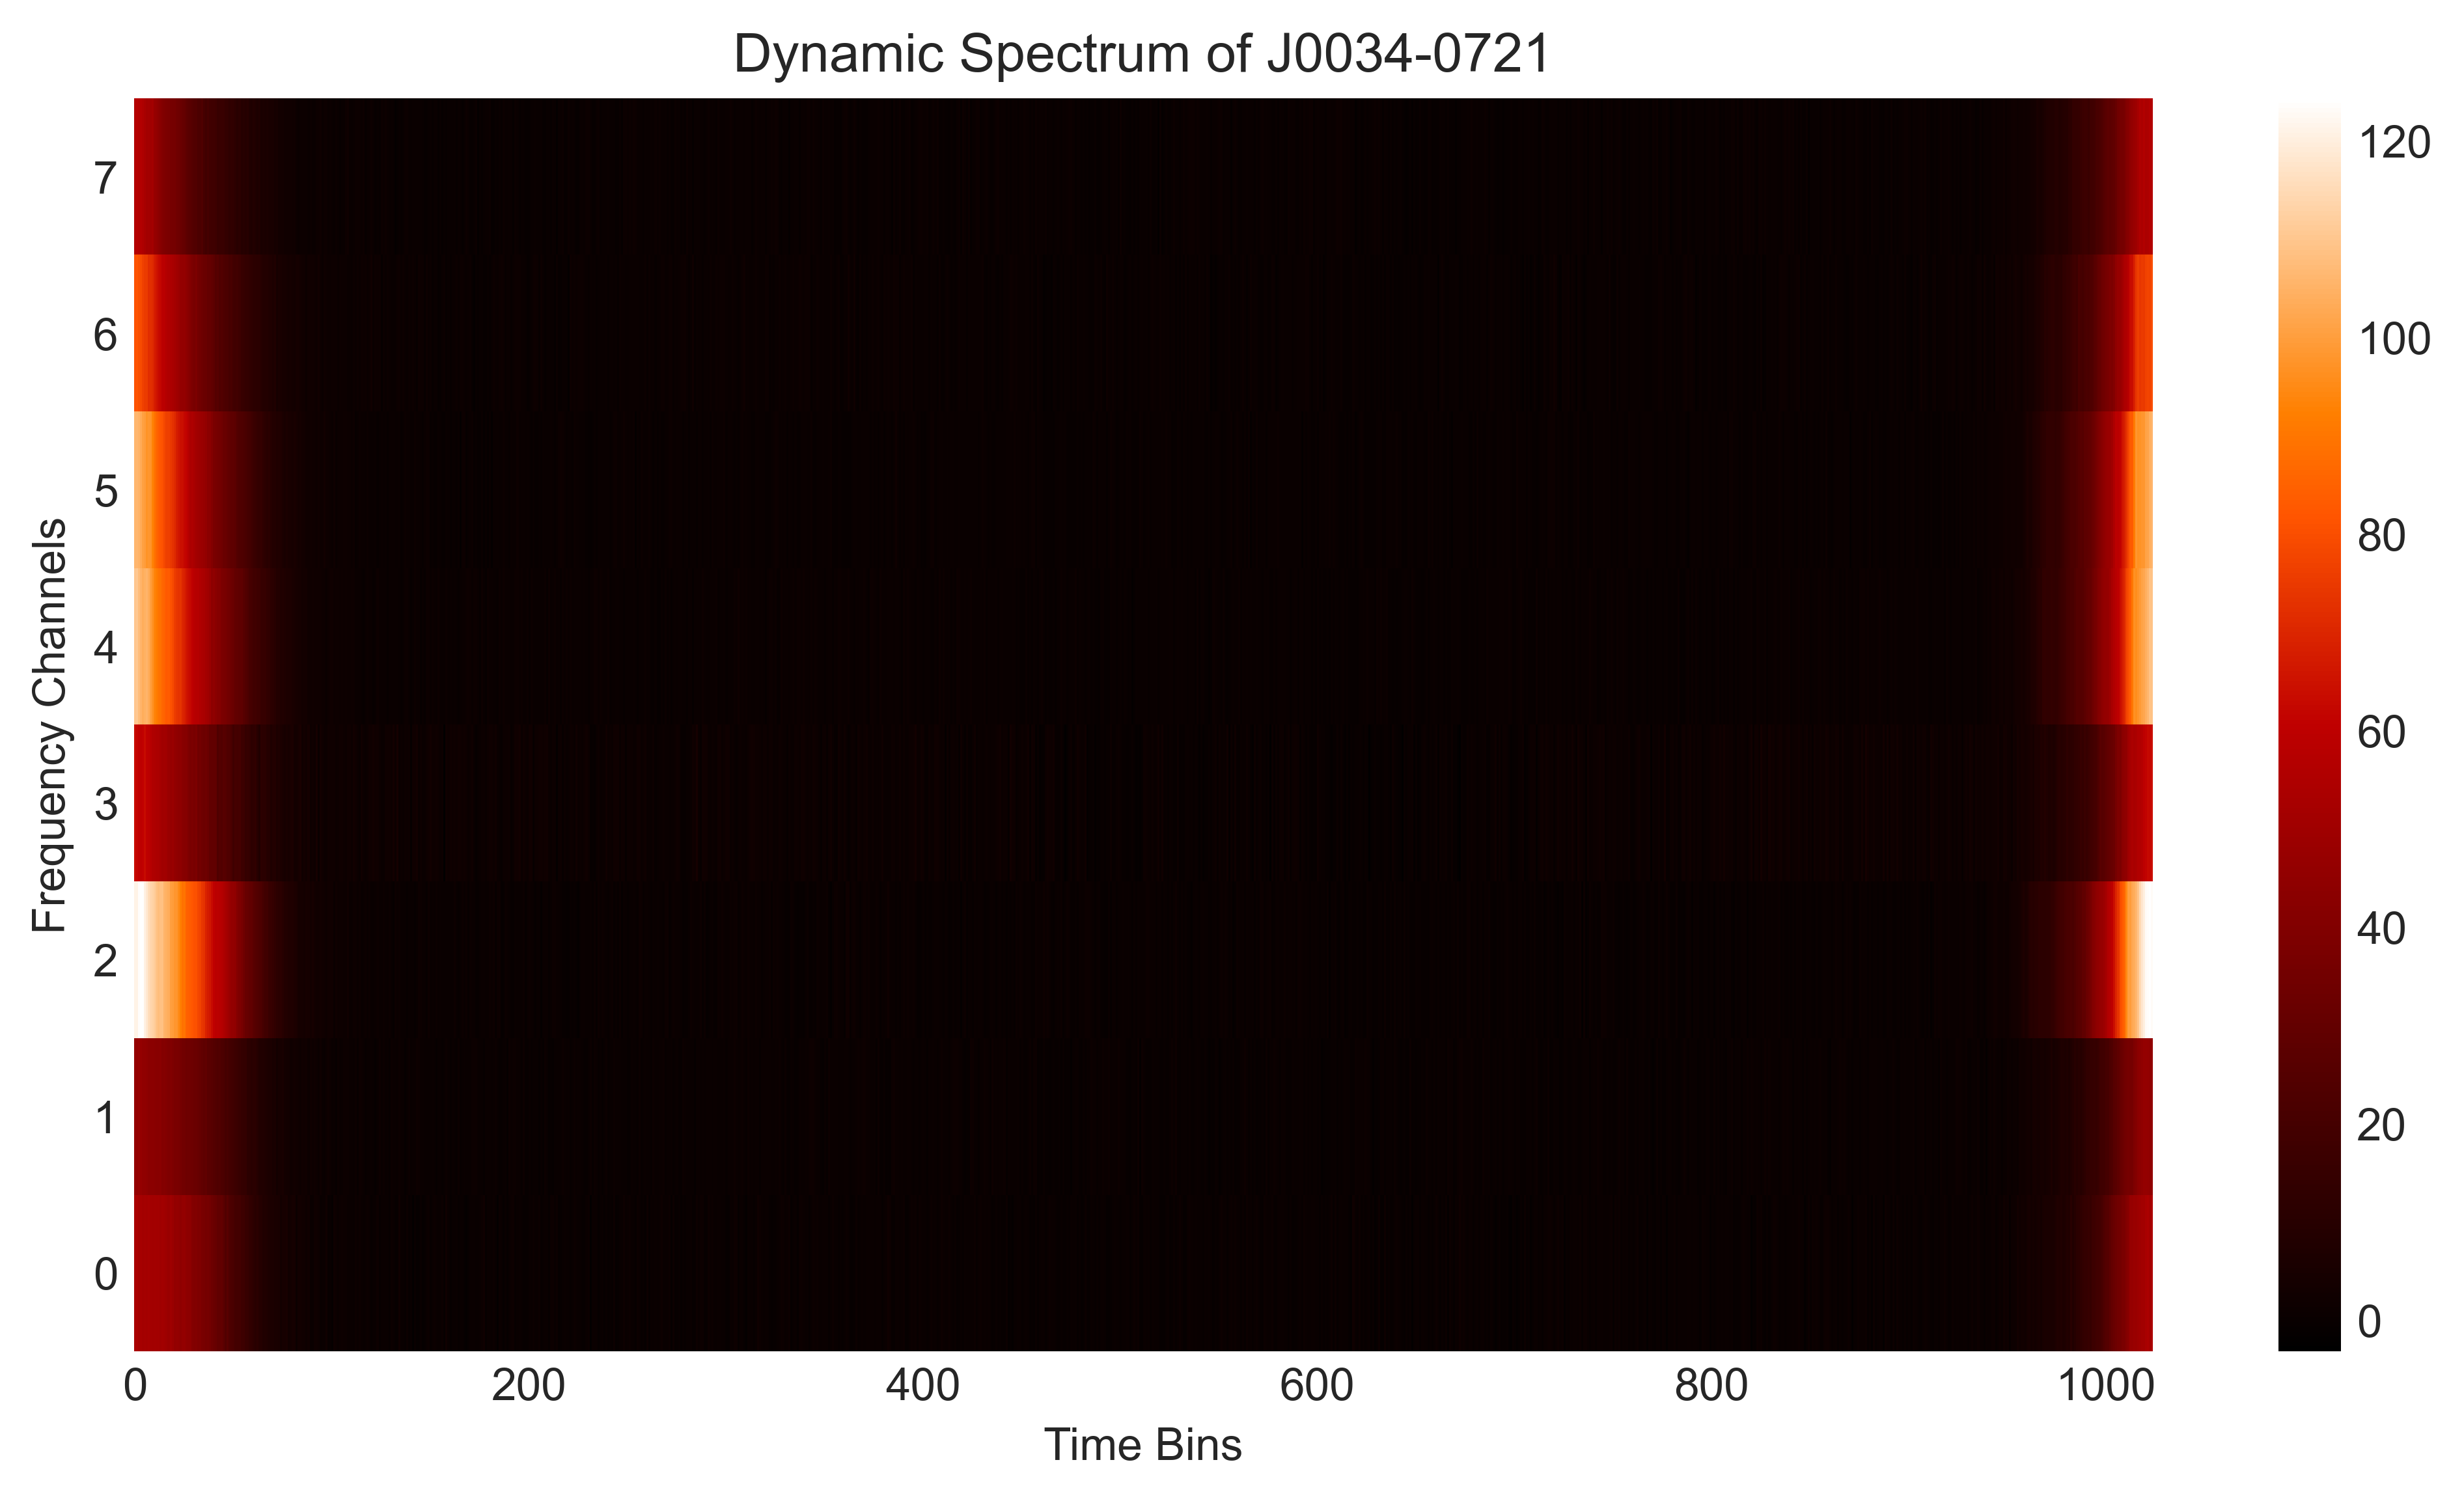

In [6]:
# plotting first dynamic spectrum
plt.figure(figsize=(10, 5), dpi=500)
plt.imshow(dysp, aspect='auto', origin='lower', cmap='gist_heat')
plt.colorbar()
plt.title('Dynamic Spectrum of ' + pulsar_name)
plt.xlabel('Time Bins')
plt.ylabel('Frequency Channels')
plt.show()

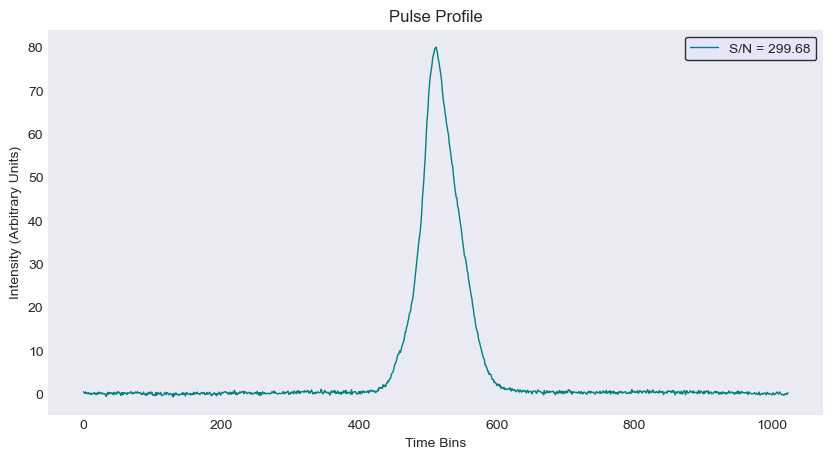

In [7]:
# function to make peak at the center
def get_pulse_profile(dysp):
    pulse_profile = np.mean(dysp, axis=0)
    peak_index = np.argmax(pulse_profile)
    pulse_profile = np.roll(pulse_profile, len(pulse_profile) // 2 - peak_index)

    return pulse_profile

# function to calculate the S/N ratio
def get_snr(pulse_profile, off_pulse_bins=(0, 400)):
    peak = np.max(pulse_profile)

    off_pulse = np.mean(pulse_profile[off_pulse_bins[0]:off_pulse_bins[1]])
    std = np.std(pulse_profile[off_pulse_bins[0]:off_pulse_bins[1]])
    snr = (peak - off_pulse) / std

    return snr


pulse_profile = get_pulse_profile(dysp)
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(pulse_profile, color='teal', lw=1, label='S/N = {:.2f}'.format(get_snr(pulse_profile)))
plt.title('Pulse Profile')
plt.xlabel('Time Bins')
plt.ylabel('Intensity (Arbitrary Units)')
plt.legend(fontsize='10', frameon=True, fancybox=True, facecolor='lavender', edgecolor='black')
plt.show()

# Testing `PsrWid`

In [8]:
from PsrWid import *

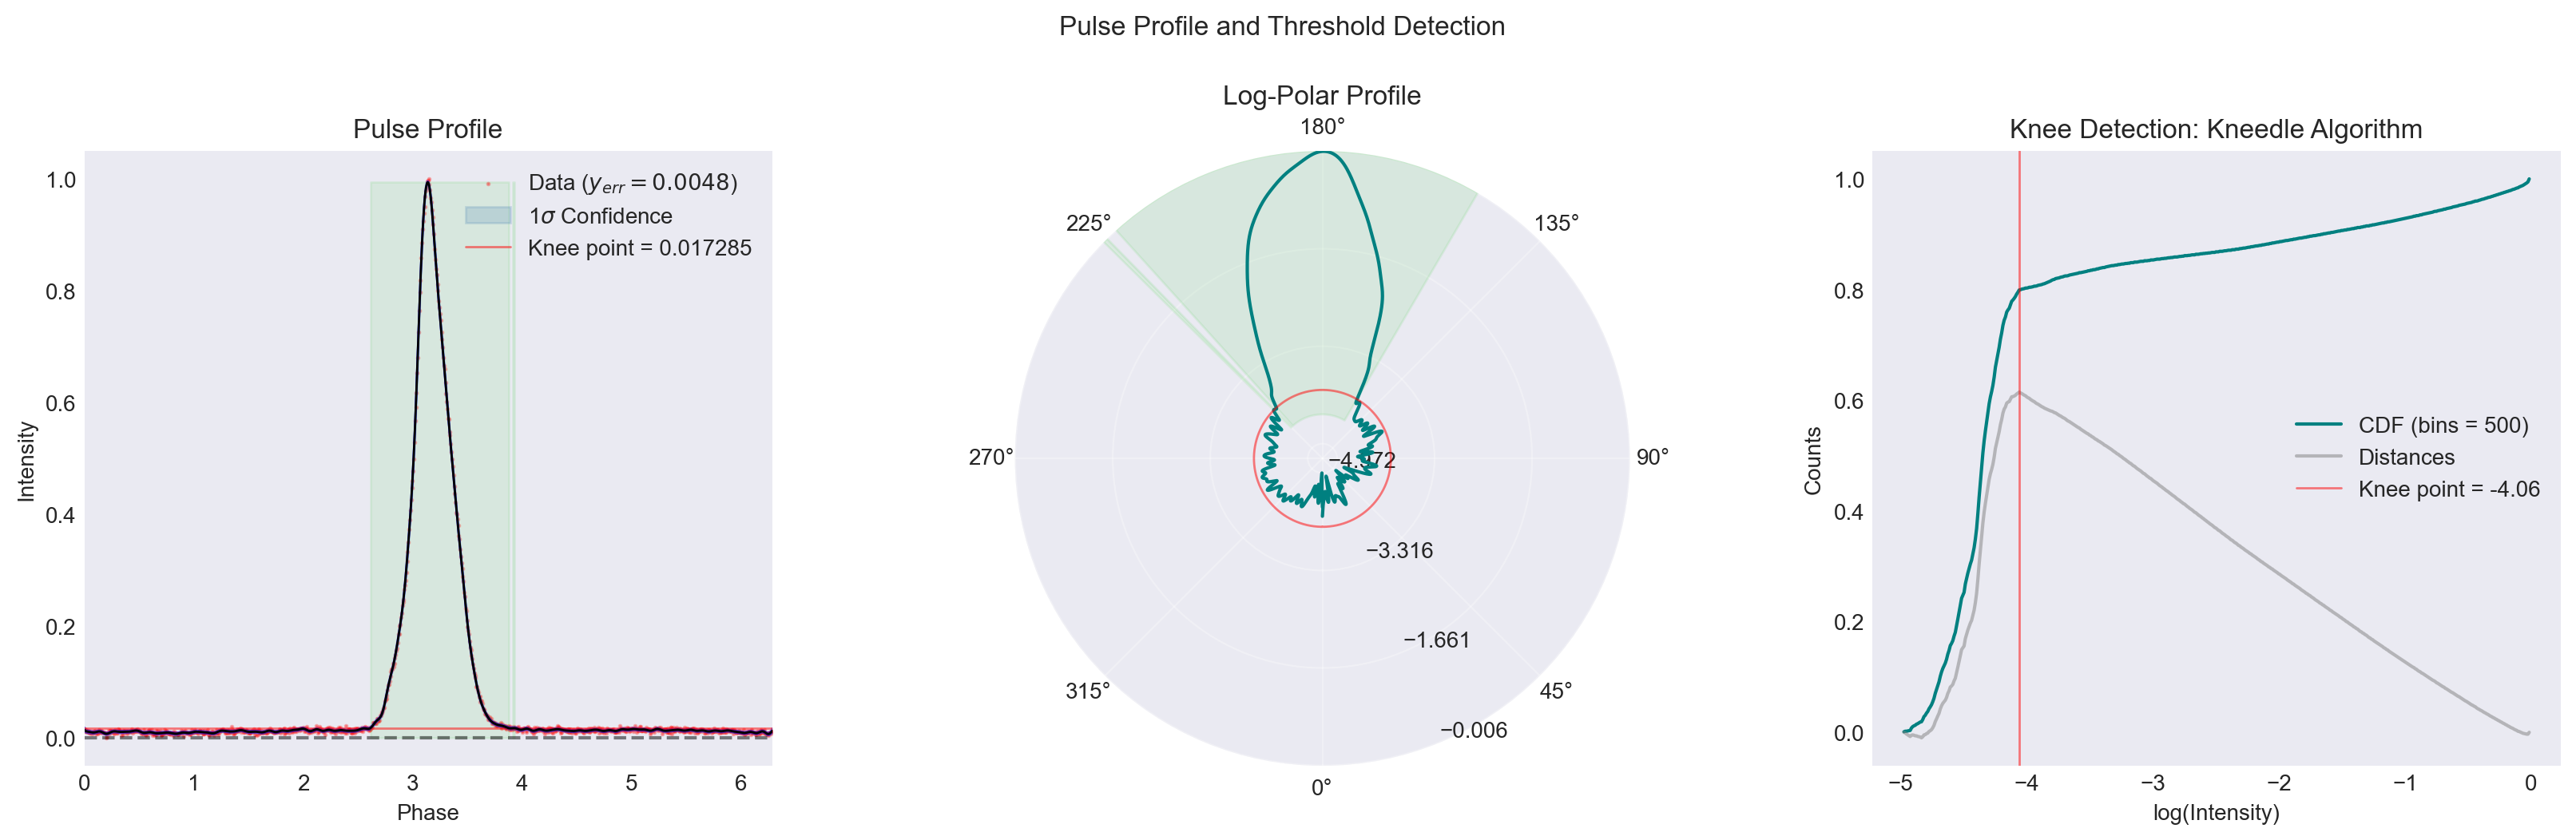

In [9]:
psr_J0034 = PsrWid(pulse_profile)
psr_J0034.plot_results(get_error=False)

In [10]:
wids, wids_plus, wids_minus, thr_p, thr_m = psr_J0034.get_widths(get_error=True, all_info=True)

In [11]:
wids

array([[[2.61211075, 3.8767284 , 1.26461766],
        [3.91663139, 3.93197869, 0.0153473 ]]])

In [12]:
from tqdm import tqdm

pulse_profiles = []
all_widths = []

# Wrap the loop with tqdm for progress monitoring
for pulsar_name, dysp in tqdm(spectra_dict.items(), desc="Processing Pulsars", unit="pulsar"):
    pulse_profile = get_pulse_profile(dysp)
    pulse_profiles.append(pulse_profile)

    psr = PsrWid(pulse_profile)
    wids, wids_plus, wids_minus, thr_p, thr_m = psr.get_widths(get_error=True, all_info=True)
    all_widths.append(wids)



Processing Pulsars:   1%|          | 9/1271 [00:10<26:09,  1.24s/pulsar]c:\Users\user\OneDrive - Deccan Education Society\Uni_Bonn\Masters_Thesis\TPA_DATA\Analysis\PsrWid.py:264: RuntimeWarning: invalid value encountered in log
  log_I = np.log(I_fit)
Processing Pulsars: 100%|██████████| 1271/1271 [27:52<00:00,  1.32s/pulsar]


In [13]:
#pulse_profiles = np.array(pulse_profiles)
#all_widths = np.array(all_widths)

# saving the pulse profiles and widths
#np.save('pulse_profiles.npy', pulse_profiles)
#np.save('all_widths.npy', all_widths)

# saving txt files
# np.savetxt('pulse_profiles.txt', pulse_profiles)
# np.savetxt('all_widths.txt', all_widths)

In [14]:
all_widths[2][0]

array([[1.81405106, 1.8263289 , 0.01227784],
       [2.09030249, 2.09644141, 0.00613892],
       [2.23456712, 2.26219227, 0.02762514],
       [2.98658491, 3.2812531 , 0.29466819]])

In [15]:
all_widths[0][0][:,2]

array([1.26461766, 0.0153473 ])

In [16]:
# collecting max widths from all pulsars
max_widths = []

for i in range(len(all_widths)):
    current_pulsar_widths = all_widths[i][0]
    max_widths.append(current_pulsar_widths[:,2].max())

In [17]:
# Reading metadata
eph_files = r'C:\Users\user\OneDrive - Deccan Education Society\Uni_Bonn\Masters_Thesis\TPA_DATA\metadata\eph_files'

# Initialize lists to store pulsar names, F0, and F1 values
psr_names_dysp = list(spectra_dict.keys())
psr_names_ephm = []
f0_list = []
f1_list = []

# Iterate through all .par files in the directory
for filename in os.listdir(eph_files):
    if filename.endswith(".par"):  # Process only .par files
        pulsar_name = filename.replace(".par", "")  # Extract pulsar name from filename
        psr_names_ephm.append(pulsar_name)
        
        file_path = os.path.join(eph_files, filename)
        f0 = None
        f1 = None
        
        with open(file_path, 'r') as file:
            for line in file:
                # Extract F0 value
                if line.startswith("F0"):
                    f0 = float(line.split()[1])
                # Extract F1 value
                elif line.startswith("F1"):
                    f1 = float(line.split()[1])
        
        # Append F0 and F1 to their respective lists
        f0_list.append(f0)
        f1_list.append(f1)

# Combine pulsar names, F0, and F1 into a list of tuples
pulsar_data = list(zip(psr_names_ephm, f0_list, f1_list))

# Print the results
print("Pulsar Names:", psr_names_ephm)
print("F0 values:", f0_list)
print("F1 values:", f1_list)
print("Pulsar Data (Name, F0, F1):", pulsar_data)



Pulsar Names: ['J0034-0721', 'J0038-2501', 'J0045-7042', 'J0045-7319', 'J0108-1431', 'J0111-7131', 'J0113-7220', 'J0131-7310', 'J0133-6957', 'J0134-2937', 'J0137+1654', 'J0151-0635', 'J0152-1637', 'J0206-4028', 'J0211-8159', 'J0211-8159_p3', 'J0255-5304', 'J0302+2252', 'J0304+1932', 'J0343-3000', 'J0401-7608', 'J0418-4154', 'J0421-0345', 'J0448-2749', 'J0449-7031', 'J0450-1248', 'J0452-1759', 'J0455-6951', 'J0456-7031', 'J0457-6337', 'J0459-0210', 'J0502-6617', 'J0511-6508', 'J0514-4407', 'J0517+2212', 'J0519-6932', 'J0520-2553', 'J0522-6847', 'J0525+1115', 'J0529-6652', 'J0532-6639', 'J0533+0402', 'J0534-6703', 'J0536-7543', 'J0540-7125', 'J0543+2329', 'J0543-6851', 'J0555-7056', 'J0601-0527', 'J0614+2229', 'J0621+0336', 'J0623+0340', 'J0624-0424', 'J0627+0649', 'J0627+0706', 'J0628+0909', 'J0629+2415', 'J0630-0046', 'J0630-2834', 'J0631+0646', 'J0631+1036', 'J0633+1746', 'J0633-2015', 'J0636-4549', 'J0646+0905', 'J0647+0913', 'J0652-0142', 'J0656-2228', 'J0656-5449', 'J0658+0022', 'J

In [18]:
len(psr_names_dysp)

1271

In [19]:
len(psr_names_ephm)

1282

In [66]:
# to match the indices of pulse_profiles and f0_list
# if psr_name_ephm = psr_name_dysp then, pulse_profiles[i] = f0_list[i] 

# Initialize lists to store pulsar names, F0, and F1 values
psr_names = []
f0 = []
f1 = []
widths = []

# Iterate through all pulsar names in the list

for i in range(len(psr_names_dysp)):
    if psr_names_dysp[i] in psr_names_ephm:
        psr_names.append(psr_names_dysp[i])
        f0.append(f0_list[psr_names_ephm.index(psr_names_dysp[i])])
        f1.append(f1_list[psr_names_ephm.index(psr_names_dysp[i])])
        widths.append(max_widths[i])

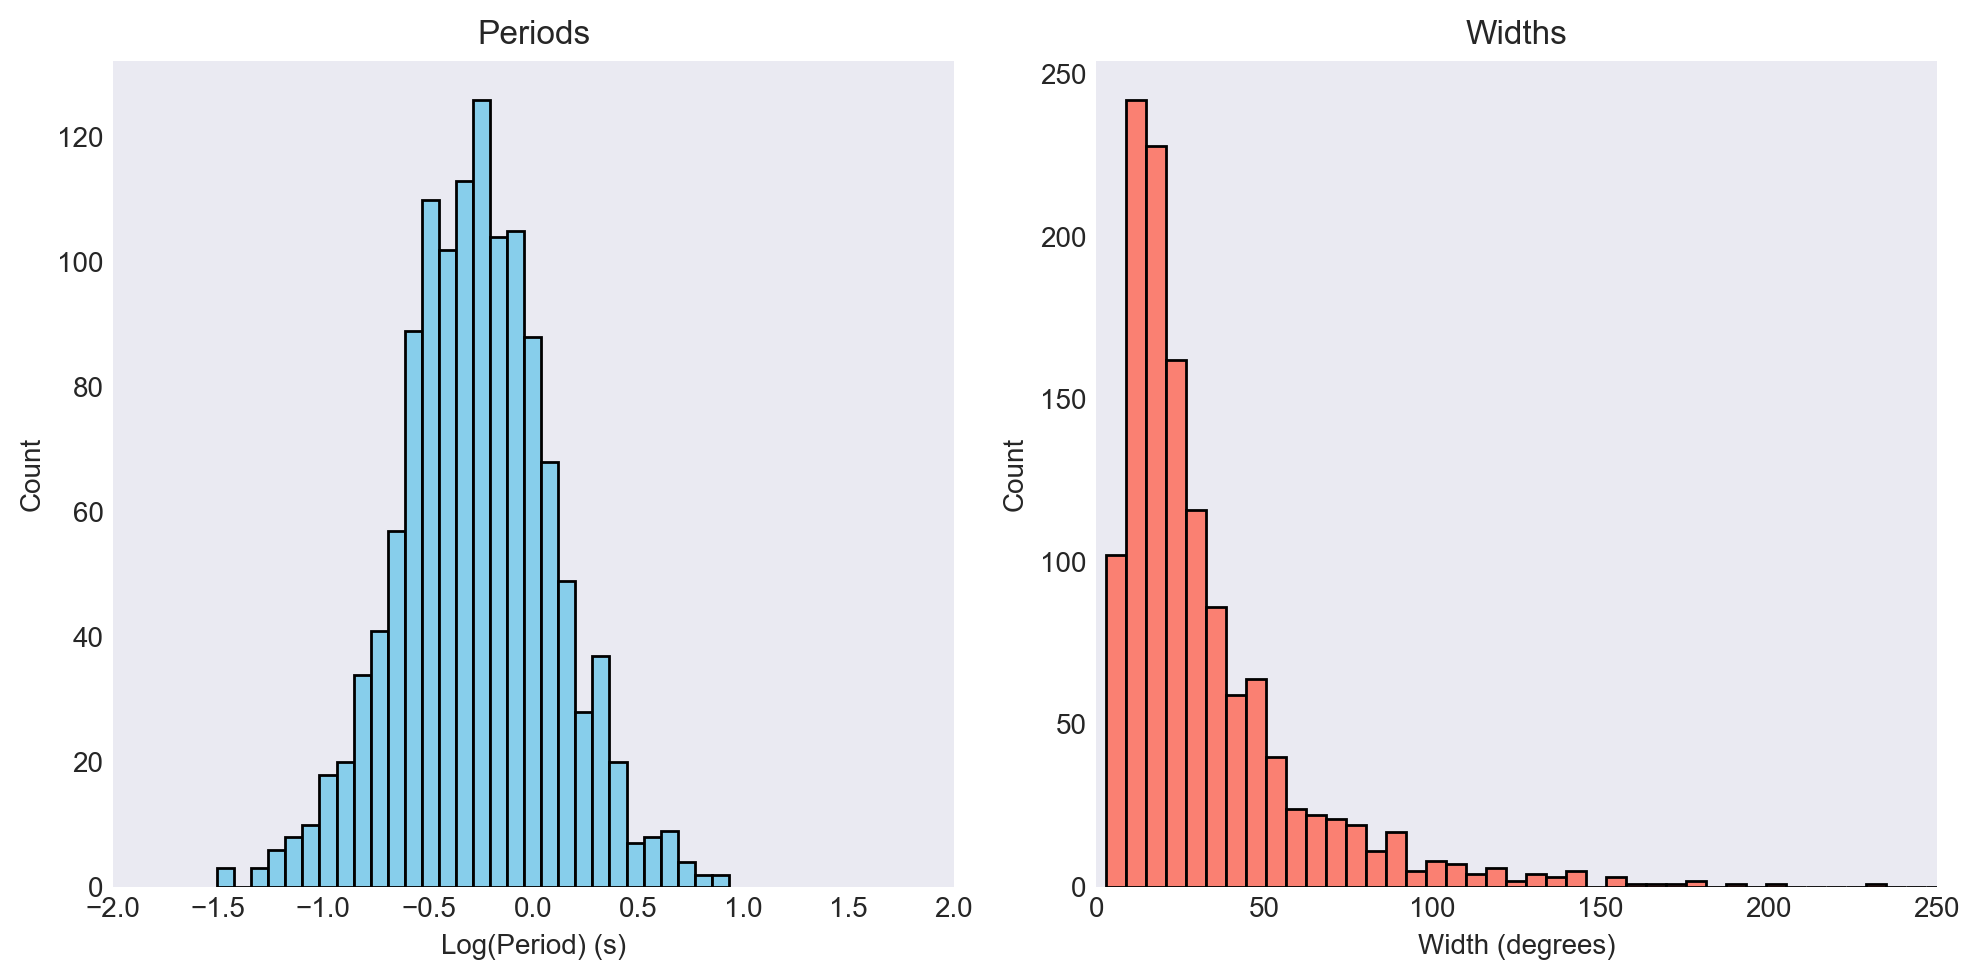

In [74]:
# Histogram for Periods and Widths - 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=200)

# Periods
axs[0].hist(np.log10(1 / np.array(f0)), bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Periods')
axs[0].set_xlabel('Log(Period) (s)')
axs[0].set_ylabel('Count')
axs[0].set_xlim(-2, 2)

# Widths
axs[1].hist(np.degrees(np.array(widths)), bins=60, color='salmon', edgecolor='black')
axs[1].set_title('Widths')
axs[1].set_xlabel('Width (degrees)')
axs[1].set_ylabel('Count')
axs[1].set_xlim(0, 250)

plt.tight_layout()
plt.show()


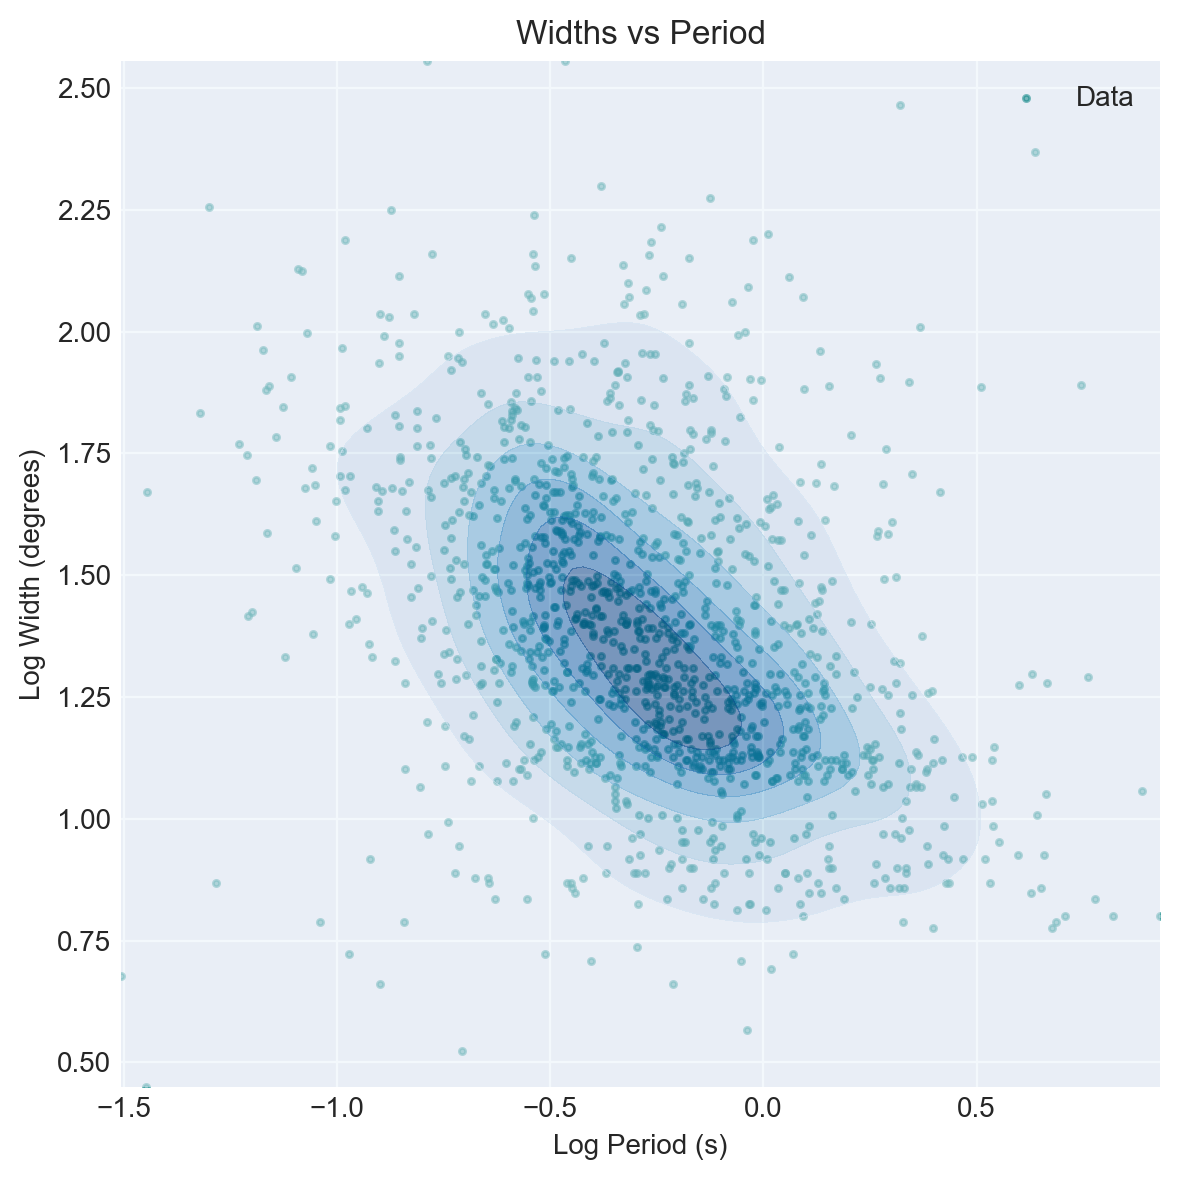

In [85]:
from scipy.stats import gaussian_kde

# Data Preparation
f0 = np.array(f0)
p0 = 1 / f0  # Period
widths = np.array(widths)
widths_d = np.degrees(widths)

log_period = np.log10(p0)
log_widths = np.log10(widths_d)

# Plotting Setup
plt.figure(figsize=(6, 6), dpi=200)
plt.scatter(log_period, log_widths, color='teal', s=5, alpha=0.5, label='Data')

# 2D Kernel Density Estimation
values = np.vstack([log_period, log_widths])
kde = gaussian_kde(values)
kde.set_bandwidth(bw_method='scott')  # Adjust bandwidth if needed

# Grid for Contours
x = np.linspace(log_period.min(), log_period.max(), 100)
y = np.linspace(log_widths.min(), log_widths.max(), 100)
X, Y = np.meshgrid(x, y)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Contour Plot
contour_levels = np.linspace(Z.min(), Z.max(), 8)  # Customize levels if needed
#plt.contour(X, Y, Z, levels=contour_levels, cmap='Greens', alpha=0.7)
plt.contourf(X, Y, Z, levels=contour_levels, cmap='Blues', alpha=0.5)

# Labels and Title
plt.title('Widths vs Period')
plt.xlabel('Log Period (s)')
plt.ylabel('Log Width (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
